預測趨勢依Close Price-Open Price是否大於0做評估

參考資料:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

https://keras.io/models/sequential/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
import random
from keras import models, layers, optimizers, regularizers
from sklearn import preprocessing
import tensorflow as tf
from tqdm import tqdm
from sklearn import datasets

Using TensorFlow backend.


In [2]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [3]:
train_data['Move'] = train_data['Close Price']-train_data['Open Price']
train_data.loc[train_data['Move'] >= 0, "Move"] = 1
train_data.loc[train_data['Move'] <= 0, "Move"] = 0

In [4]:
train_data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Move
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,1.0
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,0.0
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,1.0
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,0.0
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,1.0


In [5]:
test_data['Move'] = test_data['Close Price']-test_data['Open Price']
test_data.loc[test_data['Move'] >= 0, "Move"] = 1
test_data.loc[test_data['Move'] <= 0, "Move"] = 0

In [6]:
test_data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,Move
0,02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,1.0
1,03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,1.0
2,04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,1.0
3,05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,1.0
4,08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,1.0


In [7]:
test_data.isnull().sum()

Date           0
Open Price     0
Close Price    0
High Price     0
Low Price      0
Volume         0
Move           0
dtype: int64

In [8]:
train_data.isnull().sum()

Date           0
Open Price     0
Close Price    0
High Price     0
Low Price      0
Volume         0
Move           0
dtype: int64

資料沒有遺漏值，不需做遺漏值填補

In [9]:
test_data = test_data.drop(columns = "Date")
train_data = train_data.drop(columns = "Date")
test_data = test_data.drop(columns = "Close Price")
train_data = train_data.drop(columns = "Close Price")

此處Date為不重要資訊故移除

Close Price為預測結果的一部分，也做移除

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 5 columns):
Open Price    2264 non-null float64
High Price    2264 non-null float64
Low Price     2264 non-null float64
Volume        2264 non-null int64
Move          2264 non-null float64
dtypes: float64(4), int64(1)
memory usage: 88.5 KB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
Open Price    252 non-null float64
High Price    252 non-null float64
Low Price     252 non-null float64
Volume        252 non-null int64
Move          252 non-null float64
dtypes: float64(4), int64(1)
memory usage: 9.9 KB


In [12]:
def split(train_data, test_data):
    x_train = train_data.loc[:, train_data.columns != 'Move']
    y_train = train_data['Move']
    x_test = test_data.loc[:, test_data.columns != 'Move']
    y_test = test_data['Move']
    return x_train, y_train, x_test, y_test

In [13]:
def plot_feature(data, feature_name):
    plt.figure(figsize=(10, 3))
    plt.scatter(data[feature_name], data['Move'])
    plt.xlabel(feature_name)
    plt.ylabel('Move')
    plt.show()

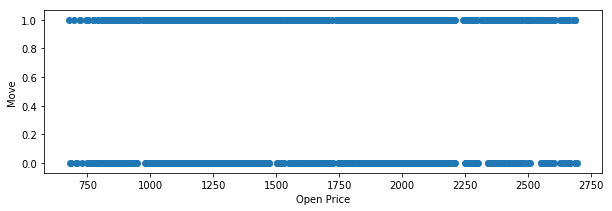

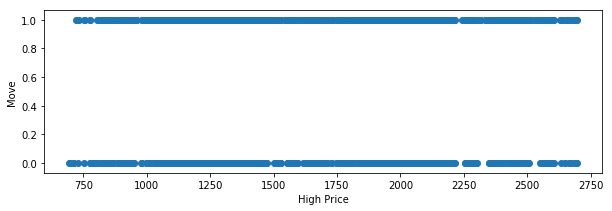

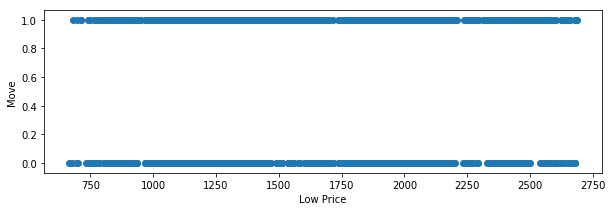

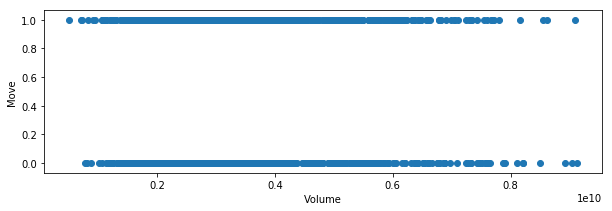

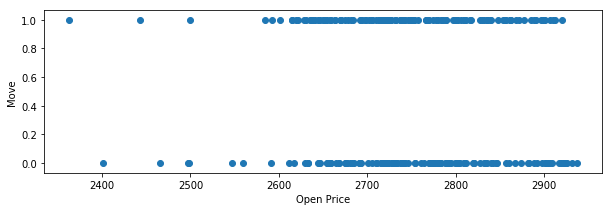

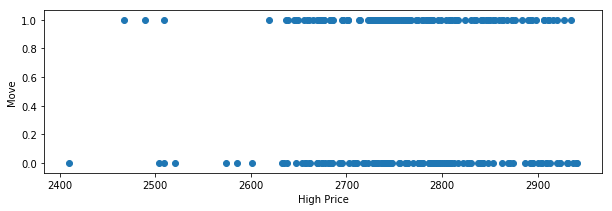

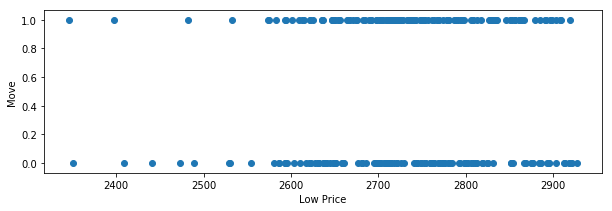

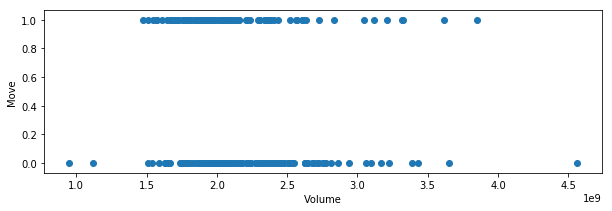

In [14]:
#Open Price	Close Price	High Price	Low Price	Volume
plot_feature(train_data, 'Open Price')
plot_feature(train_data, 'High Price')
plot_feature(train_data, 'Low Price')
plot_feature(train_data, 'Volume')
plot_feature(test_data, 'Open Price')
plot_feature(test_data, 'High Price')
plot_feature(test_data, 'Low Price')
plot_feature(test_data, 'Volume')

In [15]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)

## Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression
x_train, y_train, x_test, y_test = split(train_data, test_data)
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(x_train.astype('int'), y_train.astype('int'))
evaluate(clf, x_train.astype('int'), y_train.astype('int'), x_test.astype('int'), y_test.astype('int'))

Train accuracy: 0.5123674911660777
Test accuracy: 0.4087301587301587


In [17]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(x_train.round(), y_train.round())
evaluate(clf, x_train.round(), y_train.round(), x_test.round(), y_test.round())

Train accuracy: 0.5463780918727915
Test accuracy: 0.503968253968254


In [18]:
z_train = x_train.drop(columns = "Low Price")
z_test = x_test.drop(columns = "Low Price")

In [19]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.round(), y_train.round())
evaluate(clf, z_train.round(), y_train.round(), z_test.round(), y_test.round())

Train accuracy: 0.5463780918727915
Test accuracy: 0.503968253968254


In [20]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(x_train.astype('int'), y_train.astype('int'))
evaluate(clf, x_train.astype('int'), y_train.astype('int'), x_test.astype('int'), y_test.astype('int'))

Train accuracy: 0.5123674911660777
Test accuracy: 0.4087301587301587


In [21]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.astype('int'), y_train.astype('int'))
evaluate(clf, z_train.astype('int'), y_train.astype('int'), z_test.astype('int'), y_test.astype('int'))

Train accuracy: 0.5123674911660777
Test accuracy: 0.4087301587301587


In [22]:
z_train = x_train.drop(columns = "High Price")
z_test = x_test.drop(columns = "High Price")

In [23]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.round(), y_train.round())
evaluate(clf, z_train.round(), y_train.round(), z_test.round(), y_test.round())

Train accuracy: 0.5463780918727915
Test accuracy: 0.503968253968254


In [24]:
z_train = x_train.drop(columns = "Open Price")
z_test = x_test.drop(columns = "Open Price")

In [25]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.round(), y_train.round())
evaluate(clf, z_train.round(), y_train.round(), z_test.round(), y_test.round())

Train accuracy: 0.5463780918727915
Test accuracy: 0.503968253968254


In [26]:
z_train = x_train.drop(columns = "Open Price")
z_test = x_test.drop(columns = "Open Price")
z_train = z_train.drop(columns = "Low Price")
z_test = z_test.drop(columns = "Low Price")

In [27]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.round(), y_train.round())
evaluate(clf, z_train.round(), y_train.round(), z_test.round(), y_test.round())

Train accuracy: 0.5463780918727915
Test accuracy: 0.503968253968254


In [28]:
z_train = x_train.drop(columns = "Volume")
z_test = x_test.drop(columns = "Volume")

In [29]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.round(), y_train.round())
evaluate(clf, z_train.round(), y_train.round(), z_test.round(), y_test.round())

Train accuracy: 0.8507067137809188
Test accuracy: 0.8333333333333334


In [30]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto',max_iter=106).fit(z_train.round(), y_train.round())
evaluate(clf, z_train.round(), y_train.round(), z_test.round(), y_test.round())

Train accuracy: 0.8507067137809188
Test accuracy: 0.8333333333333334


In [31]:
clf = LogisticRegression(solver='lbfgs', multi_class = 'auto').fit(z_train.astype('int'), y_train.astype('int'))
evaluate(clf, z_train.astype('int'), y_train.astype('int'), z_test.astype('int'), y_test.astype('int'))

Train accuracy: 0.8462897526501767
Test accuracy: 0.8214285714285714


各欄位直接去掉小數的Train accuracy和Test accuracy較四捨五入的低。而Train則較Test高。

Train accuracy: 0.5463780918727915

Test accuracy: 0.503968253968254

嘗試過丟掉各項欄位，accuracy幾乎沒變動，除了丟掉Volume這個欄位，Train accuracy accuracy會上升但是四捨五入的資料結果不收斂。

增加迭代次數到106次時四捨五入的資料會收斂，

此測試資料最高accuracy為丟掉Volume欄位直接去掉小數位的資料，

Train accuracy: 0.8507067137809188

Test accuracy: 0.8333333333333334

## SVM

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train.astype('float'))

x_train_std = scaler.transform(x_train.astype('float'))
x_test_std = scaler.transform(x_test.astype('float'))

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [34]:
penalty = 0.05

svm = SVC(C=penalty, kernel="linear").fit(x_train_std.astype('int'), y_train.values.astype('int'))
acc_train = accuracy_score(y_train.values.astype('int'), svm.predict(x_train_std.astype('int'))) * 100
acc_test = accuracy_score(y_test.values.astype('int'), svm.predict(x_test_std.astype('int'))) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 54.64 %, Test accuracy = 50.40 %


In [35]:
penalty = 0.05

svm = SVC(C=penalty, kernel="linear").fit(x_train_std.round(), y_train.values.round())
acc_train = accuracy_score(y_train.values.round(), svm.predict(x_train_std.round())) * 100
acc_test = accuracy_score(y_test.values.round(), svm.predict(x_test_std.round())) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 54.64 %, Test accuracy = 50.40 %


In [36]:
z_train = x_train.drop(columns = "Low Price")
z_test = x_test.drop(columns = "Low Price")

In [37]:
scaler.fit(z_train.astype('float'))
z_train_std = scaler.transform(z_train.astype('float'))
z_test_std = scaler.transform(z_test.astype('float'))

In [38]:
svm = SVC(C=penalty, kernel="linear").fit(z_train_std.astype('int'), y_train.values.astype('int'))
acc_train = accuracy_score(y_train.values.astype('int'), svm.predict(z_train_std.astype('int'))) * 100
acc_test = accuracy_score(y_test.values.astype('int'), svm.predict(z_test_std.astype('int'))) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 54.64 %, Test accuracy = 50.40 %


In [39]:
z_train = x_train.drop(columns = "High Price")
z_test = x_test.drop(columns = "High Price")
scaler.fit(z_train.astype('float'))
z_train_std = scaler.transform(z_train.astype('float'))
z_test_std = scaler.transform(z_test.astype('float'))

In [40]:
svm = SVC(C=penalty, kernel="linear").fit(z_train_std.astype('int'), y_train.values.astype('int'))
acc_train = accuracy_score(y_train.values.astype('int'), svm.predict(z_train_std.astype('int'))) * 100
acc_test = accuracy_score(y_test.values.astype('int'), svm.predict(z_test_std.astype('int'))) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 54.64 %, Test accuracy = 50.40 %


In [41]:
z_train = x_train.drop(columns = "Open Price")
z_test = x_test.drop(columns = "Open Price")
scaler.fit(z_train.astype('float'))
z_train_std = scaler.transform(z_train.astype('float'))
z_test_std = scaler.transform(z_test.astype('float'))

In [42]:
svm = SVC(C=penalty, kernel="linear").fit(z_train_std.astype('int'), y_train.values.astype('int'))
acc_train = accuracy_score(y_train.values.astype('int'), svm.predict(z_train_std.astype('int'))) * 100
acc_test = accuracy_score(y_test.values.astype('int'), svm.predict(z_test_std.astype('int'))) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 54.64 %, Test accuracy = 50.40 %


In [43]:
z_train = x_train.drop(columns = "Volume")
z_test = x_test.drop(columns = "Volume")
scaler.fit(z_train.astype('float'))
z_train_std = scaler.transform(z_train.astype('float'))
z_test_std = scaler.transform(z_test.astype('float'))

In [44]:
svm = SVC(C=penalty, kernel="linear").fit(z_train_std.astype('int'), y_train.values.astype('int'))
acc_train = accuracy_score(y_train.values.astype('int'), svm.predict(z_train_std.astype('int'))) * 100
acc_test = accuracy_score(y_test.values.astype('int'), svm.predict(z_test_std.astype('int'))) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 54.64 %, Test accuracy = 50.40 %


不論丟掉哪個欄位以及資料小數點處理為直接丟棄還是四捨五入結果都相同

Train accuracy = 54.64 %, Test accuracy = 50.40 %

## Neural Network

In [45]:
nx_train = preprocessing.normalize(x_train)
nx_test = preprocessing.normalize(x_test)

In [46]:
hidden_units = 20    # how many neurons in the hidden layer
activation = 'relu'  # activation function for hidden layer
l2 = 0.001           # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 20          # how many epochs to train for
batch_size = 100      # how many samples to use for each gradient descent update
dim = 4

In [47]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=dim,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [48]:
# train the parameters
history = model.fit(nx_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test,y_test), class_weight="balance")

# evaluate accuracy
train_acc = model.evaluate(nx_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(nx_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

Instructions for updating:
Use tf.cast instead.
Train on 2264 samples, validate on 252 samples
Epoch 1/10
2264/2264 [==============================] - ETA: 23s - loss: 0.7078 - acc: 0.47 - ETA: 1s - loss: 0.7081 - acc: 0.5183 - 1s 586us/step - loss: 0.7015 - acc: 0.4951 - val_loss: 7.9079 - val_acc: 0.5040
Epoch 2/10
2264/2264 [==============================] - ETA: 0s - loss: 0.6925 - acc: 0.520 - ETA: 0s - loss: 0.6920 - acc: 0.530 - ETA: 0s - loss: 0.6924 - acc: 0.527 - ETA: 0s - loss: 0.6902 - acc: 0.540 - 0s 94us/step - loss: 0.6890 - acc: 0.5464 - val_loss: 8.1230 - val_acc: 0.4960
Epoch 3/10
2264/2264 [==============================] - ETA: 0s - loss: 0.6707 - acc: 0.620 - ETA: 0s - loss: 0.6882 - acc: 0.555 - ETA: 0s - loss: 0.6883 - acc: 0.555 - 0s 76us/step - loss: 0.6895 - acc: 0.5464 - val_loss: 8.1230 - val_acc: 0.4960
Epoch 4/10
2264/2264 [==============================] - ETA: 0s - loss: 0.6949 - acc: 0.500 - ETA: 0s - loss: 0.6907 - acc: 0.544 - 0s 45us/step - loss: 0.6

In [49]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                class_weight="balance", 
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [50]:
_, test_accs = train_and_evaluate(model, nx_train, y_train, nx_test, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:16<00:00,  1.11it/s]


Avgerage Training Accuracy: 0.5417402828908638
Avgerage Testing Accuracy: 0.5035714294229237


In [53]:
z_train = x_train.drop(columns = "Volume")
z_test = x_test.drop(columns = "Volume")
nx_train = preprocessing.normalize(z_train)
nx_test = preprocessing.normalize(z_test)
dim = 3

In [55]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=dim,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

In [56]:
_, test_accs = train_and_evaluate(model, nx_train, y_train, nx_test, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:13<00:00,  1.30it/s]


Avgerage Training Accuracy: 0.5463780920834085
Avgerage Testing Accuracy: 0.5039682549143596


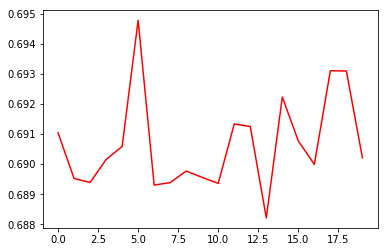

In [57]:
history = model.fit(
    nx_train, y_train, epochs=epochs, batch_size=batch_size, 
    class_weight="balance", verbose=False)
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

先查看資料型態以及填補遺漏值，做SVM前先把資料做標準化，做Neural Network前，把資料做normal。

本次預測結果

Logistic Regression

Train accuracy: 0.5463780918727915

Test accuracy: 0.503968253968254

---
SVM

Train accuracy = 54.64 % 

Test accuracy = 50.40 %

---
Neural Network

Training accuracy: 0.5463780920834086

Testing accuracy: 0.5039682549143595

---
原始資料三個模型跑出來的預測準確率幾乎一樣，

若資料型態不同，則跑出來的結果也會不同。

而經過調整後，丟棄Volume欄位(看圖形這類資料較分散)的Logistic Regression的Accuracy有更高的預測率。
